In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [66]:
sns.set(rc={'figure.figsize':(14,10)})

In [4]:
df = pd.read_csv('AB_NYC_2019.csv')

In [5]:
print(df)

             id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_grou

In [6]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [9]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [16]:
df.count()

id                                48895
name                              48879
host_id                           48895
host_name                         48874
neighbourhood_group               48895
neighbourhood                     48895
latitude                          48895
longitude                         48895
room_type                         48895
price                             48895
minimum_nights                    48895
number_of_reviews                 48895
last_review                       38843
reviews_per_month                 38843
calculated_host_listings_count    48895
availability_365                  48895
dtype: int64

In [20]:
df_corr=df.corr()

<ipython-input-20-0f22499c1612>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr=df.corr()


<Axes: >

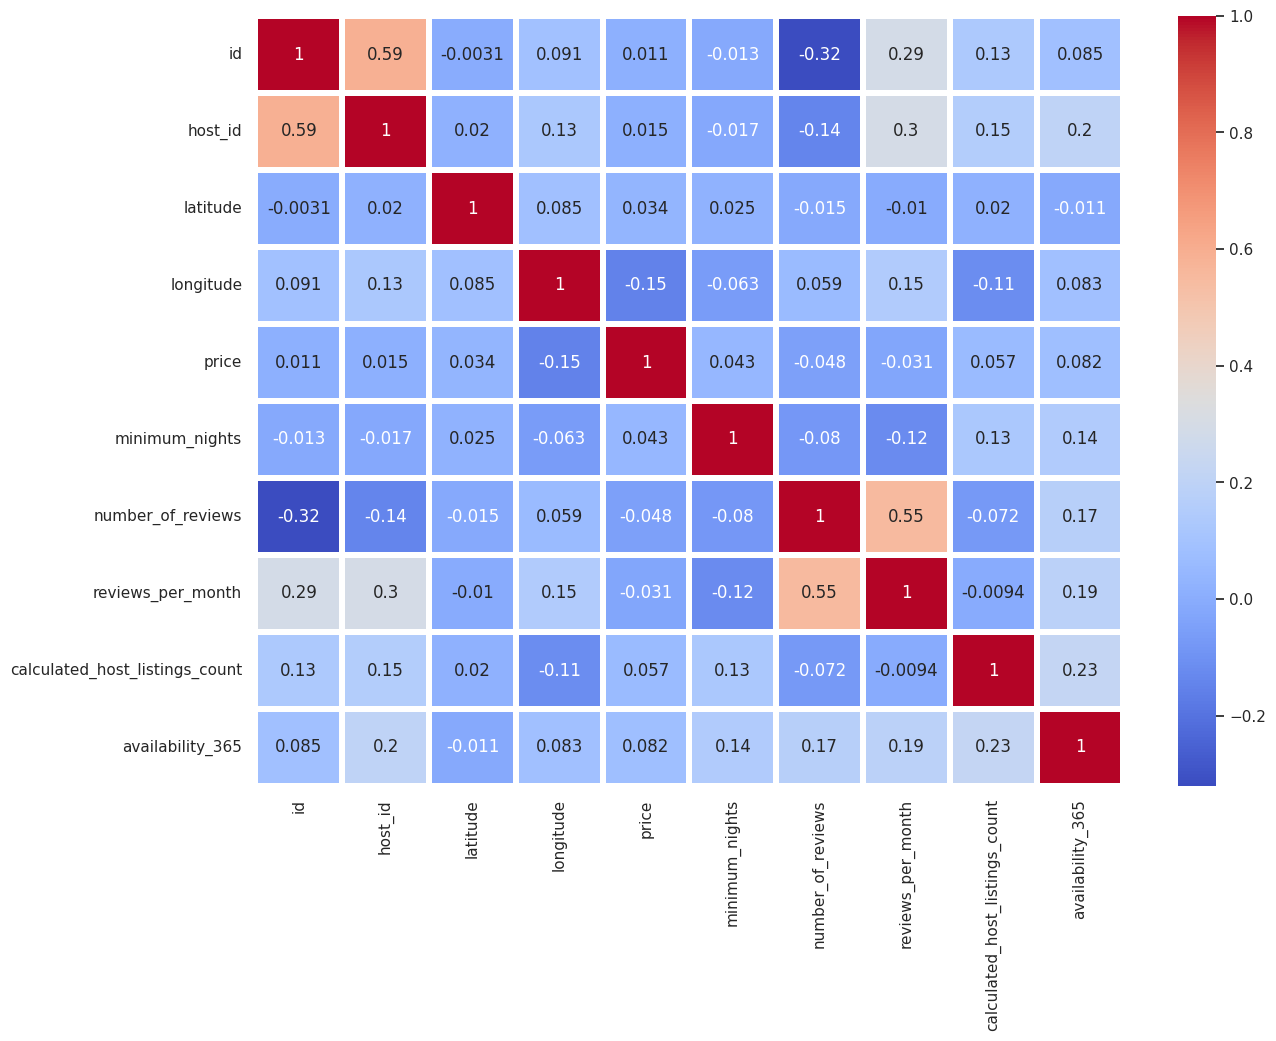

In [68]:
sns.heatmap(df_corr,annot=True,cmap='coolwarm',linewidths=3
          )

In [37]:
min_night=pd.cut(df.minimum_nights,bins=20)

In [38]:
min_night.value_counts()

(-0.249, 63.45]      48566
(63.45, 125.9]         192
(125.9, 188.35]         63
(313.25, 375.7]         38
(188.35, 250.8]         13
(250.8, 313.25]         11
(438.15, 500.6]          6
(937.75, 1000.2]         4
(1187.55, 1250.0]        1
(375.7, 438.15]          1
(563.05, 625.5]          0
(500.6, 563.05]          0
(687.95, 750.4]          0
(750.4, 812.85]          0
(812.85, 875.3]          0
(875.3, 937.75]          0
(1000.2, 1062.65]        0
(1062.65, 1125.1]        0
(1125.1, 1187.55]        0
(625.5, 687.95]          0
Name: minimum_nights, dtype: int64

In [42]:
price=pd.cut(df.price,bins=20, right=True)
price.value_counts()

(-10.0, 500.0]       47851
(500.0, 1000.0]        805
(1000.0, 1500.0]       100
(1500.0, 2000.0]        53
(2500.0, 3000.0]        21
(2000.0, 2500.0]        20
(3500.0, 4000.0]        11
(4500.0, 5000.0]         6
(9500.0, 10000.0]        6
(4000.0, 4500.0]         6
(6000.0, 6500.0]         4
(3000.0, 3500.0]         2
(5500.0, 6000.0]         2
(7000.0, 7500.0]         2
(7500.0, 8000.0]         2
(5000.0, 5500.0]         2
(6500.0, 7000.0]         1
(8000.0, 8500.0]         1
(8500.0, 9000.0]         0
(9000.0, 9500.0]         0
Name: price, dtype: int64

In [43]:
price.unique()

[(-10.0, 500.0], (500.0, 1000.0], (1500.0, 2000.0], (1000.0, 1500.0], (2500.0, 3000.0], ..., (9500.0, 10000.0], (3000.0, 3500.0], (8000.0, 8500.0], (7000.0, 7500.0], (6500.0, 7000.0]]
Length: 18
Categories (20, interval[float64, right]): [(-10.0, 500.0] < (500.0, 1000.0] < (1000.0, 1500.0] <
                                            (1500.0, 2000.0] ... (8000.0, 8500.0] <
                                            (8500.0, 9000.0] < (9000.0, 9500.0] < (9500.0, 10000.0]]

In [44]:
min_night.unique()

[(-0.249, 63.45], (63.45, 125.9], (125.9, 188.35], (188.35, 250.8], (313.25, 375.7], (250.8, 313.25], (937.75, 1000.2], (1187.55, 1250.0], (438.15, 500.6], (375.7, 438.15]]
Categories (20, interval[float64, right]): [(-0.249, 63.45] < (63.45, 125.9] < (125.9, 188.35] <
                                            (188.35, 250.8] ... (1000.2, 1062.65] <
                                            (1062.65, 1125.1] < (1125.1, 1187.55] <
                                            (1187.55, 1250.0]]

In [46]:
min_night.head()

0    (-0.249, 63.45]
1    (-0.249, 63.45]
2    (-0.249, 63.45]
3    (-0.249, 63.45]
4    (-0.249, 63.45]
Name: minimum_nights, dtype: category
Categories (20, interval[float64, right]): [(-0.249, 63.45] < (63.45, 125.9] < (125.9, 188.35] <
                                            (188.35, 250.8] ... (1000.2, 1062.65] <
                                            (1062.65, 1125.1] < (1125.1, 1187.55] <
                                            (1187.55, 1250.0]]

In [47]:
price.head()

0    (-10.0, 500.0]
1    (-10.0, 500.0]
2    (-10.0, 500.0]
3    (-10.0, 500.0]
4    (-10.0, 500.0]
Name: price, dtype: category
Categories (20, interval[float64, right]): [(-10.0, 500.0] < (500.0, 1000.0] < (1000.0, 1500.0] <
                                            (1500.0, 2000.0] ... (8000.0, 8500.0] <
                                            (8500.0, 9000.0] < (9000.0, 9500.0] < (9500.0, 10000.0]]

Text(0.5, 1.0, 'Class Frequencies of Cut Prices')

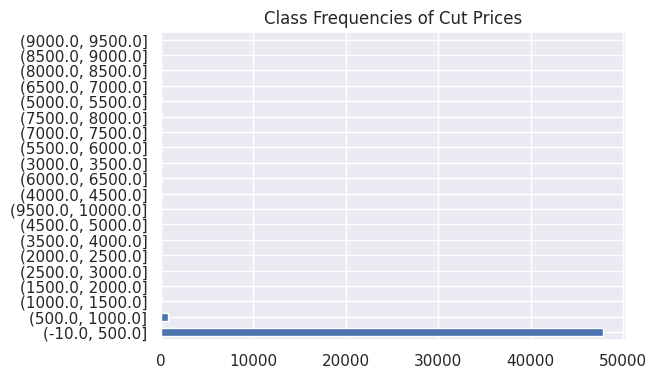

In [49]:
price.value_counts().plot.barh().set_title("Class Frequencies of Cut Prices")

Text(0.5, 1.0, 'Class Frequencies of Cut Prices')

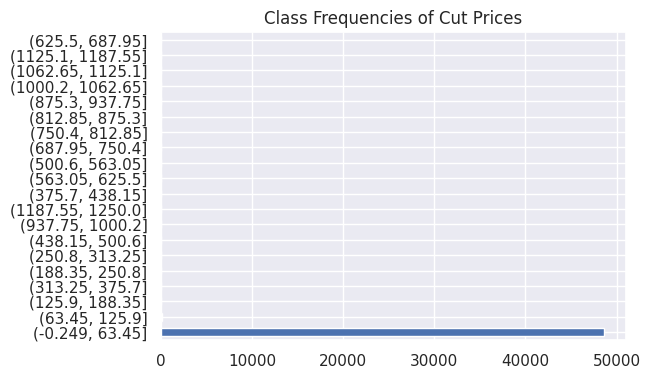

In [50]:
min_night.value_counts().plot.barh().set_title("Class Frequencies of Cut Prices")

In [57]:
num_review=pd.cut(df.number_of_reviews,bins=10)
num_review

0        (-0.629, 62.9]
1        (-0.629, 62.9]
2        (-0.629, 62.9]
3        (251.6, 314.5]
4        (-0.629, 62.9]
              ...      
48890    (-0.629, 62.9]
48891    (-0.629, 62.9]
48892    (-0.629, 62.9]
48893    (-0.629, 62.9]
48894    (-0.629, 62.9]
Name: number_of_reviews, Length: 48895, dtype: category
Categories (10, interval[float64, right]): [(-0.629, 62.9] < (62.9, 125.8] < (125.8, 188.7] <
                                            (188.7, 251.6] ... (377.4, 440.3] < (440.3, 503.2] <
                                            (503.2, 566.1] < (566.1, 629.0]]

Text(0.5, 1.0, 'Cut of Price and Review')

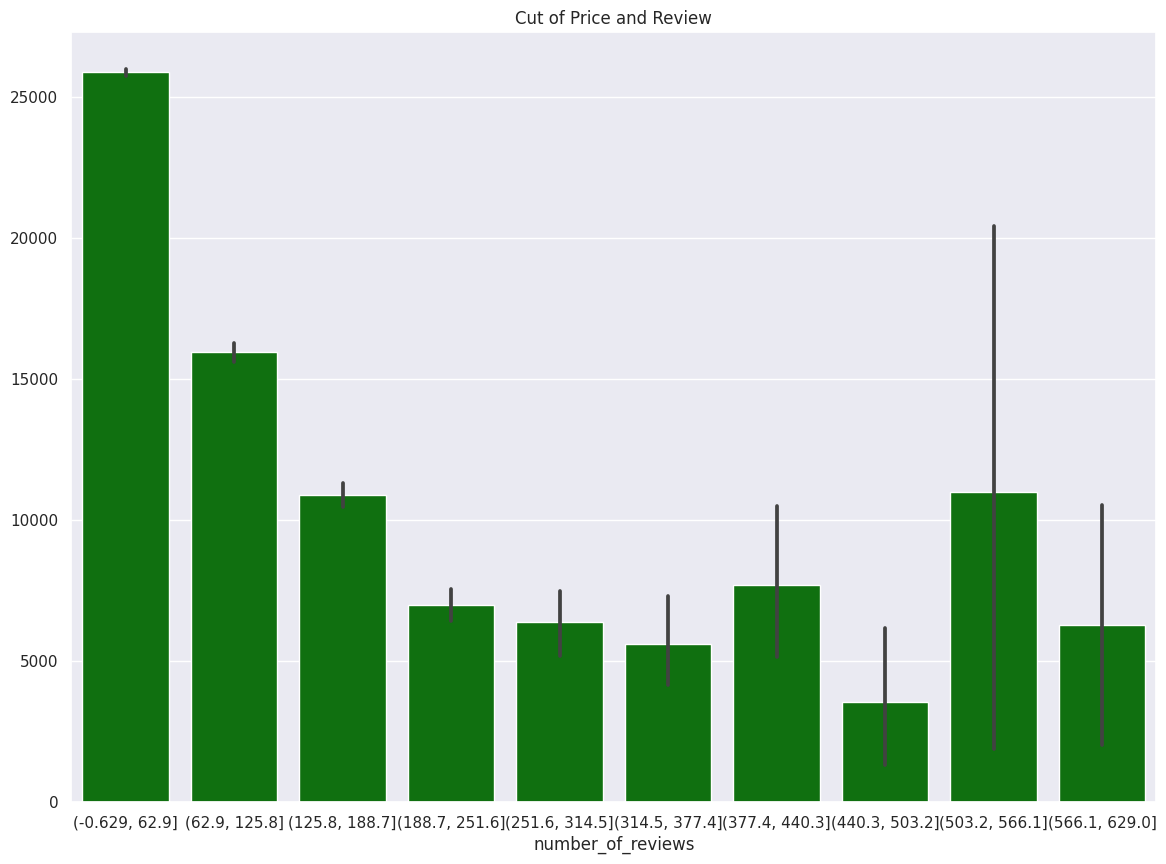

In [67]:
sns.barplot(x=num_review, y=price.index, data=df, color="Green").set_title("Cut of Price and Review")

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [84]:
df["price"].value_counts()

100    2051
150    2047
50     1534
60     1458
200    1401
       ... 
780       1
386       1
888       1
483       1
338       1
Name: price, Length: 674, dtype: int64

In [85]:
df["price"].unique()

array([  149,   225,   150,    89,    80,   200,    60,    79,   135,
          85,   120,   140,   215,    99,   190,   299,   130,   110,
          44,   180,    50,    52,    55,    70,    35,    40,    68,
         115,   151,   228,   144,    69,    49,   375,   250,   275,
         230,    51,    65,   105,    95,   145,   285,    94,   800,
         131,    98,   100,   125,   175,   500,   101,   220,    59,
         350,   199,   325,   235,   170,   400,    75,    90,   185,
          77,    76,   160,   195,   156,   219,   475,   165,   196,
          83,   123,   265,   249,   121,    45,    71,    64,   159,
         189,   239,   305,   155,    92,    36,    37,   205,    39,
         390,   129,   212,   124,   122,   109,   575,   229,   169,
         113,   179,   349,   139,   650,    67,   599,   211,   290,
          87,   395,   260,    97,   132,   141,   495,   259,    96,
         295,   451,   300,    42,   255,    72,    88,   450,   198,
          46,    33,

In [86]:
df["price"].head()

0    149
1    225
2    150
3     89
4     80
Name: price, dtype: int64

In [88]:
df["price"].index

RangeIndex(start=0, stop=48895, step=1)

In [89]:
df["number_of_reviews"].head()

0      9
1     45
2      0
3    270
4      9
Name: number_of_reviews, dtype: int64

In [90]:
df["number_of_reviews"].unique()

array([  9,  45,   0, 270,  74,  49, 430, 118, 160,  53, 188, 167, 113,
        27, 148, 198, 260, 130,  39,  71,  88,  19,  58, 108,  29, 242,
       197, 273, 168, 231, 214, 245,  15,  25,  81,  97,  11, 248,  61,
       135, 112,  73,  82, 328, 105, 289, 138,  21,  42,   5,  66, 143,
       191,   4, 338, 106, 190,  23, 142,  54,  70,  16,  94, 194,   2,
       174,  24, 166,   1,  30, 139, 233,  68,  46, 335, 162, 170, 334,
        12, 467,   7,  38, 324, 115, 354, 195,  13,  36,  63, 155, 193,
        32,  50,  26, 426, 227,  84,   3,  10, 124, 240, 200,  79,  34,
       134, 126, 234, 202,  28, 309,  14,  80, 294, 150,  47, 219, 114,
       213,  86,  18, 206, 122,  33,  52,  51, 199,  41, 109, 151, 285,
       375,   6, 358, 226, 104, 204, 253, 129,  37,  69, 192,  17, 222,
       205, 458, 183, 189, 127,  35, 171,  92, 238,  56, 111, 147, 177,
       185,  62, 181, 333, 441, 279, 203, 210,  64, 132,  20,  67, 187,
        22,  93,  48, 120,  43,  59,  31, 220, 286, 398,  76, 18

Text(0.5, 1.0, 'Class Frequencies of Price Variable')

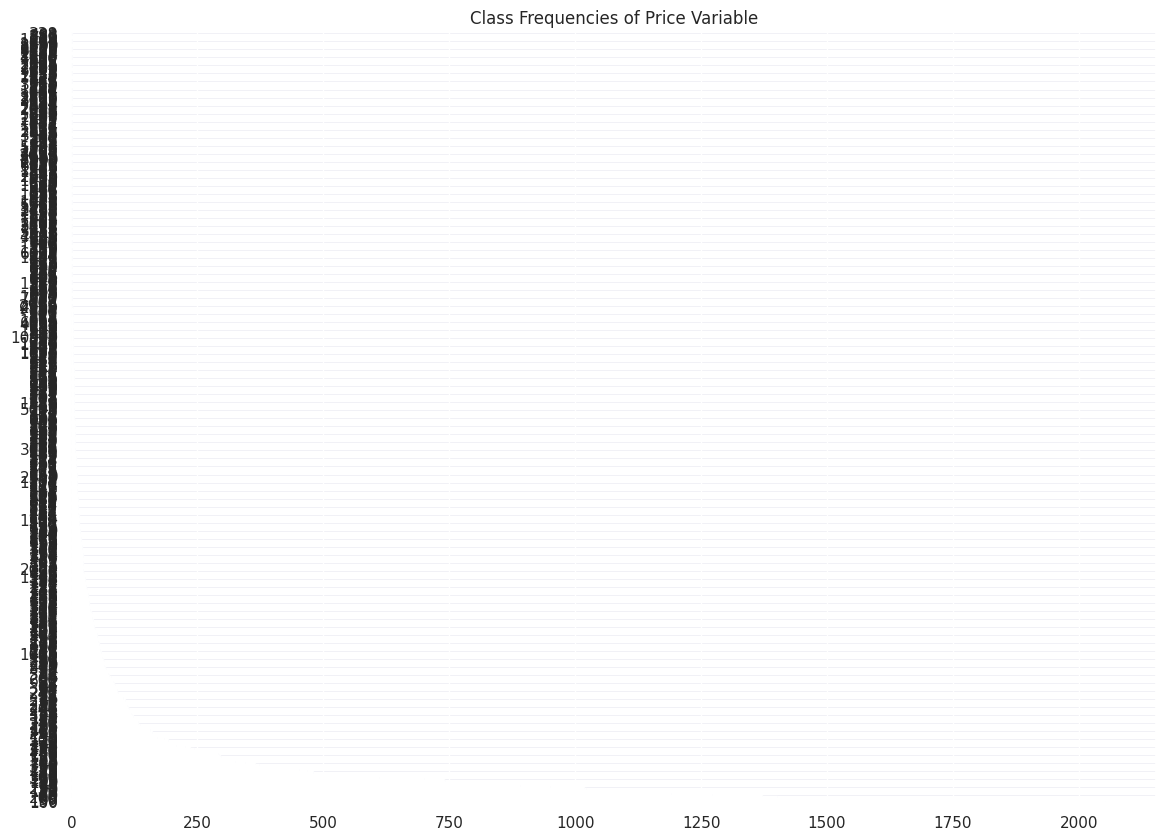

In [91]:
df["price"].value_counts().plot.barh().set_title("Class Frequencies of Price Variable")

Text(0.5, 1.0, 'Class Frequencies of Price Variable')

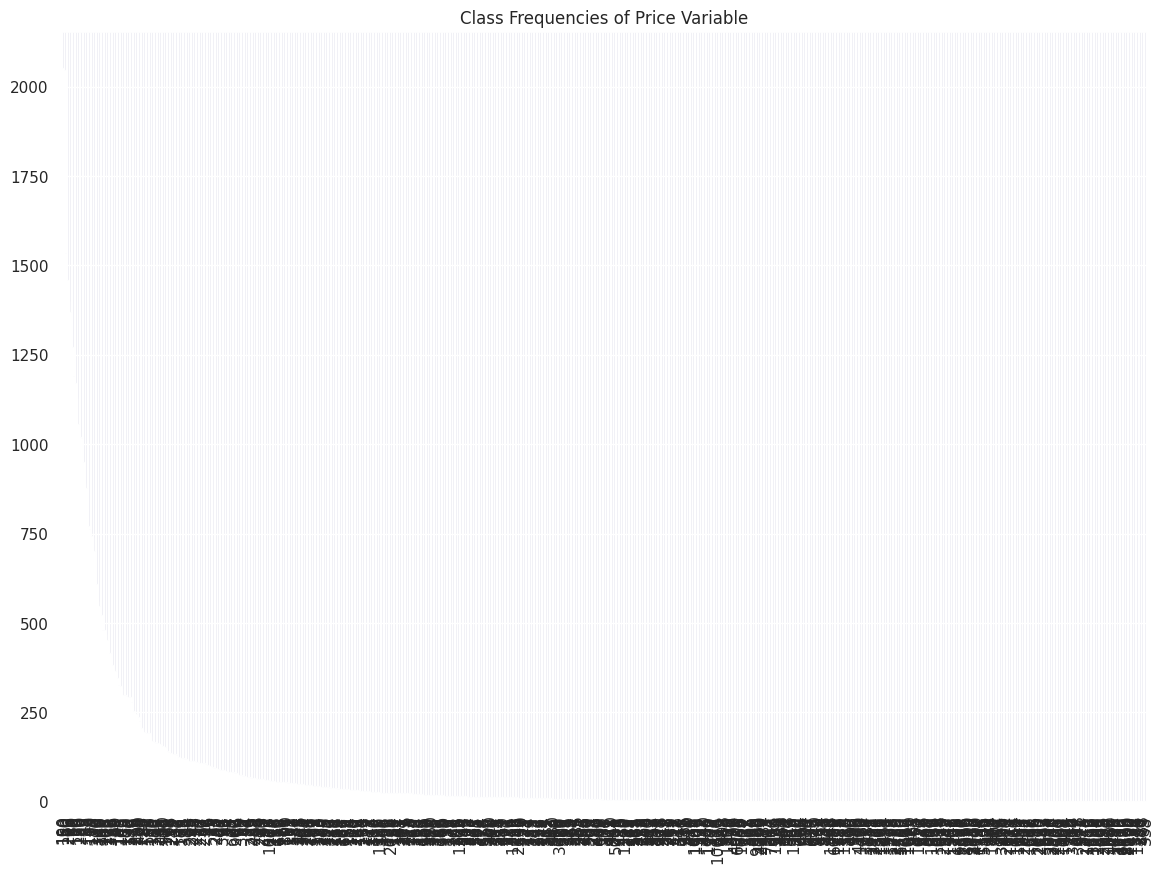

In [92]:
df["price"].value_counts().plot.bar().set_title("Class Frequencies of Price Variable")

Text(0.5, 1.0, 'Price Density')

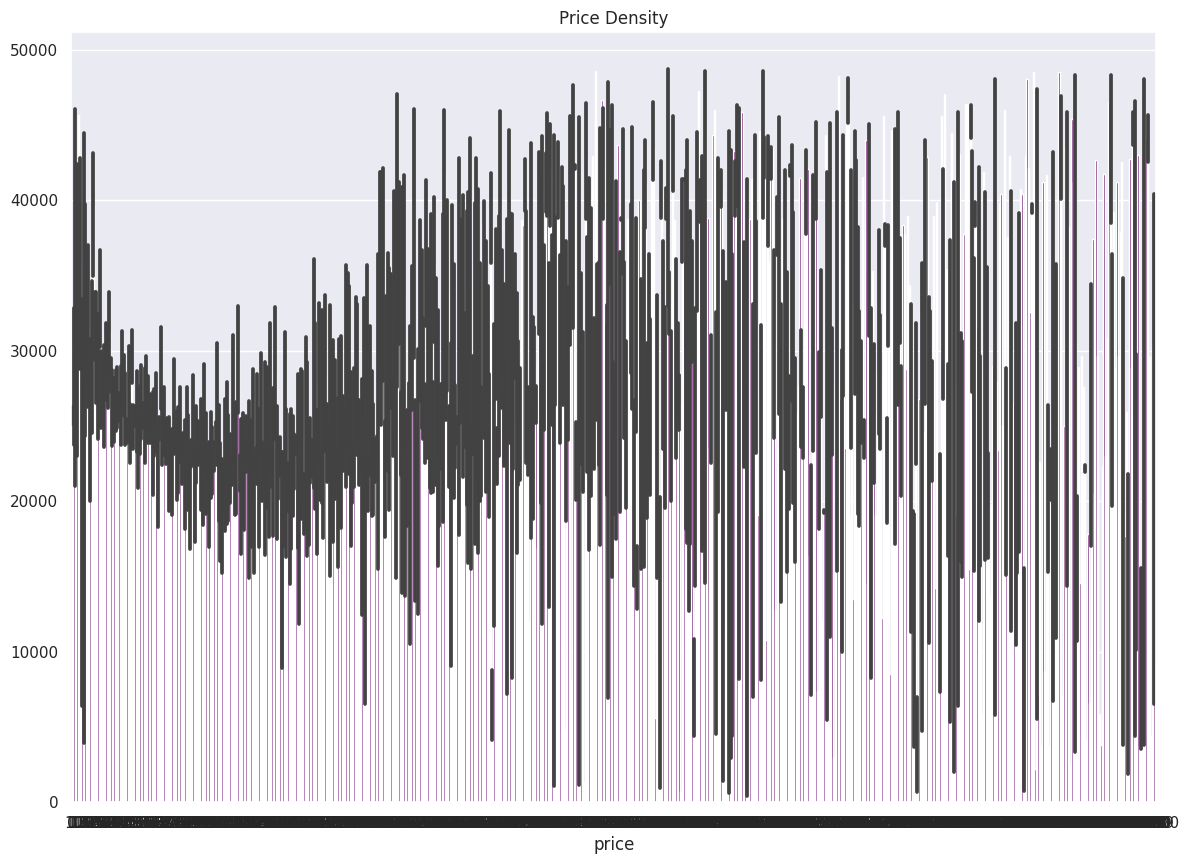

In [93]:
sns.barplot(x="price", y=df["price"].index, data=df, color="purple").set_title("Price Density")

<ipython-input-104-a73909cfd94d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("number_of_reviews").sum().plot.pie(y="price", autopct="%.1f%%", ylabel="", legend=False, figsize=(5,5))


<Axes: >

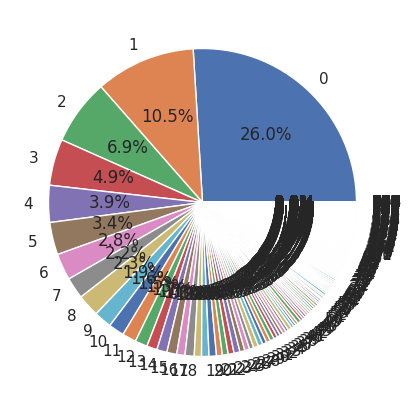

In [104]:
df.groupby("number_of_reviews").sum().plot.pie(y="price", autopct="%.1f%%", ylabel="", legend=False, figsize=(5,5))

<Axes: xlabel='price', ylabel='Count'>

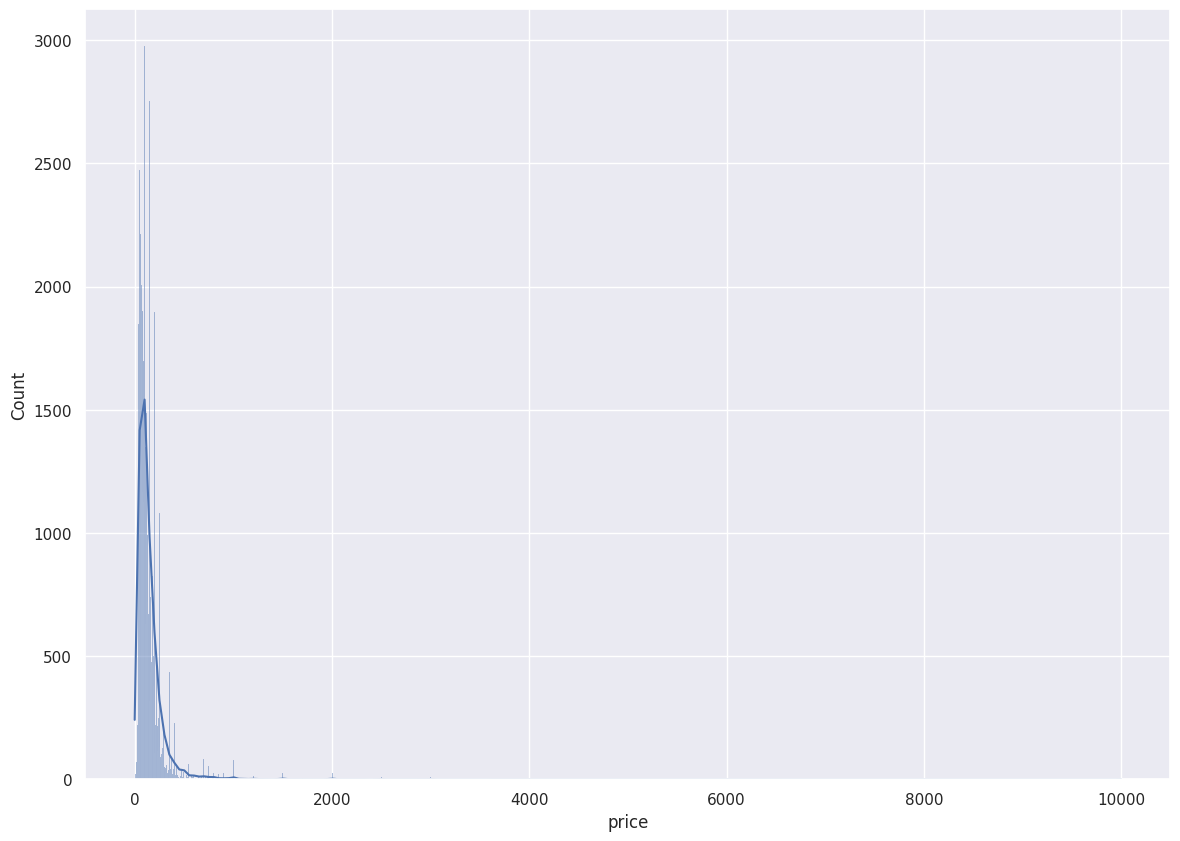

In [105]:
sns.histplot(df["price"], kde=True) # bins= auto

<Axes: xlabel='price', ylabel='Count'>

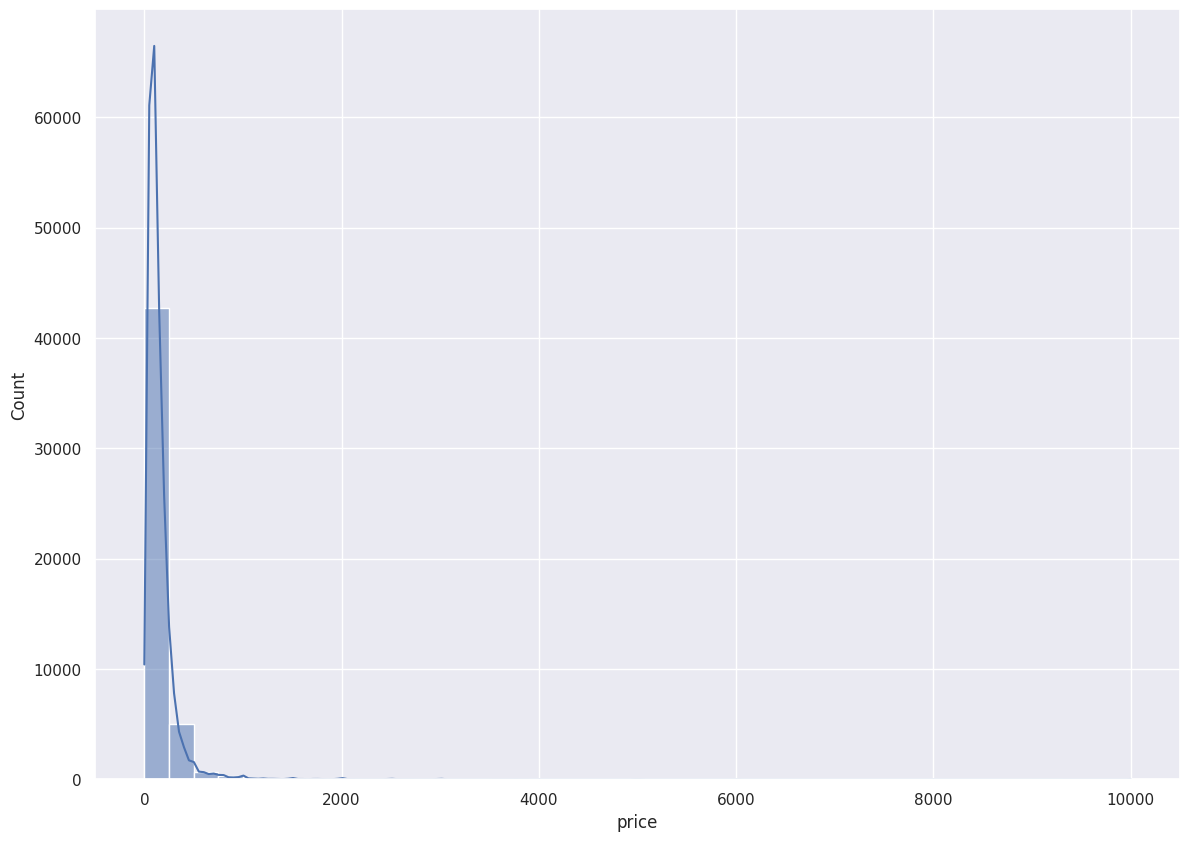

In [106]:
sns.histplot(df["price"], kde=True, bins=40)

Text(0.5, 1.0, 'Num Of Review - Price')

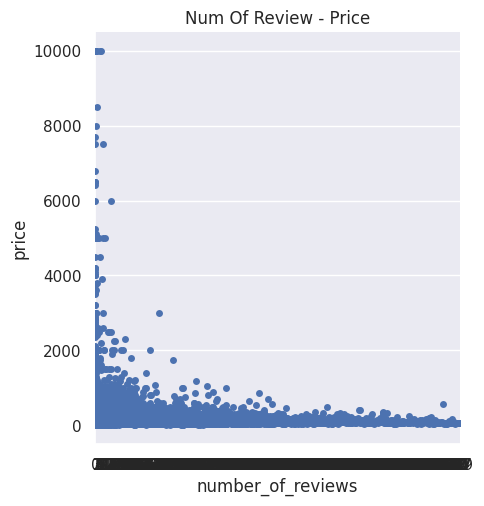

In [107]:
sns.catplot(x="number_of_reviews", y="price", data=df)
plt.title("Num Of Review - Price")

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_a

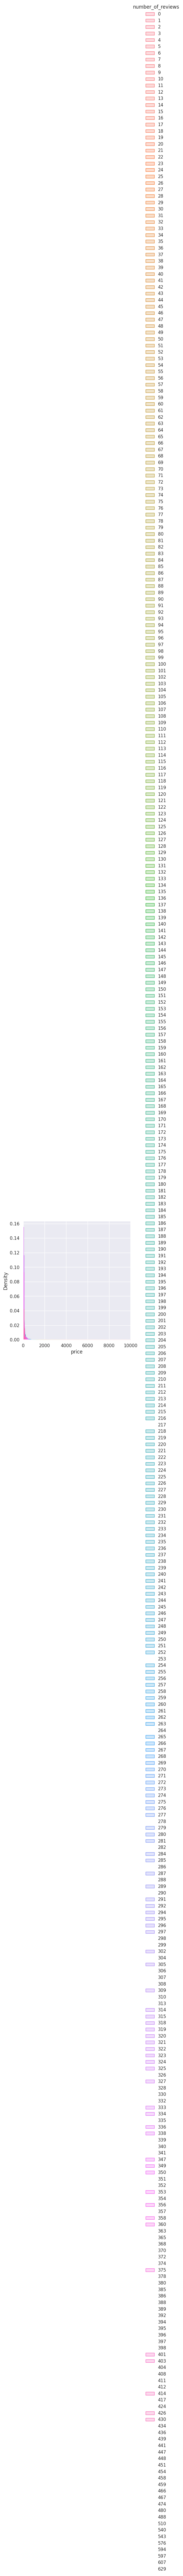

In [109]:
(sns.FacetGrid(df, hue="number_of_reviews", height=5, xlim=(0, 10000)).map(sns.kdeplot, "price", shade=True).add_legend())

<ipython-input-110-c078bb934990>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True);


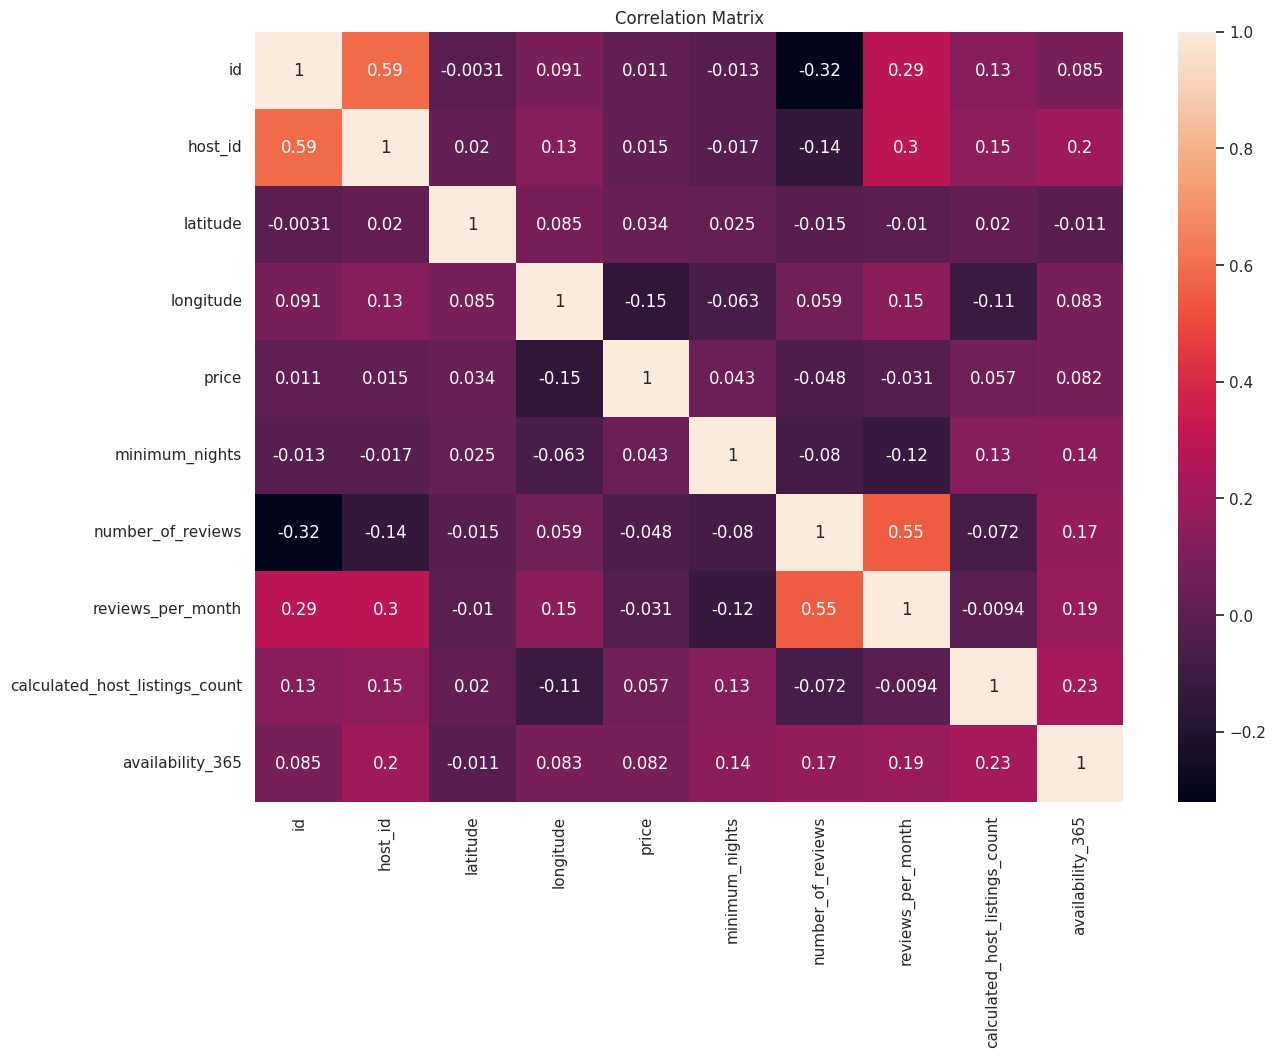

In [110]:
plt.title("Correlation Matrix")
sns.heatmap(df.corr(), annot=True);